<a href="https://colab.research.google.com/github/michaeltm365/projects/blob/main/linderman_lab/keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains the keypoint trajectories of a single subject over a day of recording.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive

drive.mount('/content/drive')

# PATH TO FILE LOCATION IN YOUR GOOGLE DRIVE
DIRPATH = '/content/drive/MyDrive/2022_summer-kf/'
FILEPATH = DIRPATH + 'p0_fish0_137_20210426.h5'

Mounted at /content/drive


In [ ]:
# "df" is short for "dataframe", which is a Pandas 2D array
df = pd.read_hdf(FILEPATH)
df
#39.67478165324076, 38.75534102270569, 16.812629150769364, 27.544602163863658, 19.748897612992636, 20.696398023859356, 13.650133746854824]

,frame_count,frame_timestamp,x_snout,y_snout,x_midbody,y_midbody,x_sidebody,y_sidebody,x_endbody,y_endbody,x_tail,y_tail,x_fan,y_fan
0,0,1.619461e+09,109.540108,142.976059,124.138733,135.067261,NaN,NaN,151.504974,123.650360,165.433395,113.957596,180.608887,105.863663
1,1,1.619461e+09,107.265854,142.104813,121.822556,136.475708,NaN,NaN,147.926788,123.891907,160.844559,115.370964,174.711700,106.121666
2,2,1.619461e+09,105.351967,142.368988,119.697525,136.510712,NaN,NaN,145.834869,123.651062,160.248383,116.183006,174.869812,107.406532
3,3,1.619461e+09,103.469025,142.543152,117.734238,136.160843,NaN,NaN,143.201263,124.122238,158.663406,117.667580,176.247086,109.998772
4,4,1.619461e+09,102.180344,142.780396,115.806297,136.204010,NaN,NaN,142.057327,123.676147,157.429688,117.932121,176.791046,110.939461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723651,1726808,1.619548e+09,84.945068,53.992599,96.640488,65.568367,NaN,NaN,108.316635,89.087357,109.255569,107.692741,109.788170,128.898438
1723652,1726809,1.619548e+09,83.437828,49.815742,97.773056,63.414818,NaN,NaN,112.321381,86.499474,113.034012,104.349236,106.420898,123.391586
1723653,1726810,1.619548e+09,82.824081,46.829994,97.266914,60.762054,NaN,NaN,114.773003,81.535423,120.126129,98.978592,110.384720,118.568207
1723654,1726811,1.619548e+09,81.770180,42.896610,94.724854,55.871910,NaN,NaN,115.567490,77.666855,122.965393,94.156998,117.896706,115.093361


**How much data is there?**

In [ ]:
# Keypoint data has float32 precision, while timestamp has float64 precision
keypoint_arr = df.to_numpy()[:, 2:]
keypoint_arr = np.array(keypoint_arr, np.float32)

print("Keypoint array details")
print(f'Shape: \t\t\t{keypoint_arr.shape}')
print(f'Size (# items): \t{keypoint_arr.size} == {np.prod(keypoint_arr.shape)}')
print(f'(Single) item size: \t{keypoint_arr.itemsize} vs. dtype {keypoint_arr.dtype}')
print(f'Size in memory: \t{keypoint_arr.nbytes / 1024**2 :.2f} MB == {keypoint_arr.itemsize * keypoint_arr.size / 1024**2 :.2f} MB')

Keypoint array details
Shape: 			(1723656, 12)
Size (# items): 	20683872 == 20683872
(Single) item size: 	4 vs. dtype float32
Size in memory: 	78.90 MB == 78.90 MB


In [ ]:
20 * 60 * 60 * 24

1728000

In [ ]:
timestamp_vec = df['frame_timestamp'].to_numpy()
print("Timestamp vector details")
print(f'Shape: \t\t\t{timestamp_vec.shape}')
print(f'Size (# items): \t{timestamp_vec.size} == {np.prod(timestamp_vec.shape)}')
print(f'(Single) item size: \t{timestamp_vec.itemsize} vs. dtype {timestamp_vec.dtype}')
print(f'Size in memory: \t{timestamp_vec.nbytes / 1024**2 :.2f} MB == {timestamp_vec.itemsize * timestamp_vec.size / 1024**2 :.2f} MB')

Timestamp vector details
Shape: 			(1723656,)
Size (# items): 	1723656 == 1723656
(Single) item size: 	8 vs. dtype float64
Size in memory: 	13.15 MB == 13.15 MB


# data exploration

**What is the rate of recording?**
The `frame_timestamp` column above provides a _64-bit precision_ _scalar representation_ of time. We convert the timestamp above (and shift into PST zone) with the below command.

How many frames are recorded per second?

In [ ]:
dt_series = pd.to_datetime(df['frame_timestamp'], unit='s') - pd.Timedelta('07:00:00')
dt_series[1] - dt_series[0]
dt_series[0]

Timestamp('2021-04-26 11:22:13.238411776')

# visualization

In [ ]:
# Reshape 2D array to a 3D array
# (num_frames=1723656, num_cols=12) -> (num_frames, num_keypoints, dim)

# Column names: x_snout	y_snout	x_midbody	y_midbody	x_sidebody	y_sidebody	x_endbody	y_endbody	x_tail	y_tail	x_fan	y_fan
keypoint_names = ['snout', 'midbody', 'sidebody', 'endbody', 'tail', 'fan']

num_frames = len(df)
num_keypoints = len(keypoint_names)
dim = 2

# Allocate array of desired shape
keypoint_arr = np.empty((num_frames, num_keypoints, dim), dtype=np.float32)
for i, dimstr in enumerate(['x', 'y']):
    # (i=0, dimstr='x')
    # (i=1, dimstr='y')

    keypoint_arr[:, :, i] = df[[dimstr + '_' + kp_name for kp_name in keypoint_names]].to_numpy()

print()
print('Filled in keypoint array')
print(keypoint_arr[50, 0])
print()
print(keypoint_arr)

# Alternatively, we could've loaded this directly from keypoint .h5 file
# import h5py
# with h5py.File(FILEPATH, 'r') as f:
#   keypoint_arr = f['stage/block0_values'][()]


Filled in keypoint array
[121.107376 143.61908 ]

[[[109.54011  142.97606 ]
  [124.13873  135.06726 ]
  [       nan        nan]
  [151.50497  123.65036 ]
  [165.4334   113.957596]
  [180.60889  105.86366 ]]

 [[107.265854 142.10481 ]
  [121.822556 136.47571 ]
  [       nan        nan]
  [147.92679  123.89191 ]
  [160.84456  115.370964]
  [174.7117   106.121666]]

 [[105.35197  142.36899 ]
  [119.697525 136.51071 ]
  [       nan        nan]
  [145.83487  123.65106 ]
  [160.24838  116.18301 ]
  [174.86981  107.40653 ]]

 ...

 [[ 82.82408   46.829994]
  [ 97.266914  60.762054]
  [       nan        nan]
  [114.773     81.53542 ]
  [120.12613   98.97859 ]
  [110.38472  118.56821 ]]

 [[ 81.77018   42.89661 ]
  [ 94.72485   55.87191 ]
  [       nan        nan]
  [115.56749   77.666855]
  [122.96539   94.157   ]
  [117.896706 115.09336 ]]

 [[ 81.60657   42.340202]
  [ 93.756645  53.572468]
  [       nan        nan]
  [114.121025  74.15508 ]
  [124.11803   88.86133 ]
  [125.768005 111.09174

109.54011


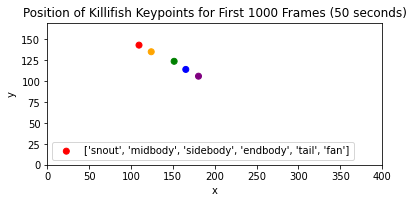

In [ ]:
# Plot the 1003rd frame of all 6 keypoints
# Get the frame (single "row") of data that we want to plot
arr = keypoint_arr[0, 0, 0]
print(arr)
len(keypoint_arr)


# (Scatter)plot a single keypoint
# Check out the function [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
plt.figure()
plt.title('Position of Killifish Keypoints for First 1000 Frames (50 seconds)')
plt.xlabel('x')
plt.ylabel('y')

colors=['red','orange','yellow','green','blue','purple']

plt.scatter(keypoint_arr[0,:6,0],keypoint_arr[0,:6,1],c=colors,label=keypoint_names)
plt.xlim(0,400)
plt.ylim(0,170)
#sets aspect ratio equal
plt.gca().set_aspect('equal')


# for j in range(6):
#   for i in range(1000):
#     plt.scatter(keypoint_arr[i,j,0],keypoint_arr[i,j,1],c=colors[j%6],marker='.',label=keypoint_names[j])


plt.legend()
plt.show()


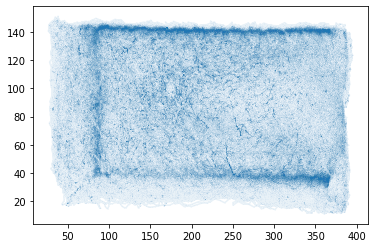

In [ ]:
i_day_start = 0
i_day_end = 8*60*60*20
#plt.scatter(keypoint_arr[i_day_start,:,0],keypoint_arr[i_day_start,:,1],c='red')
plt.plot(keypoint_arr[i_day_start:i_day_end,0,0],keypoint_arr[i_day_start:i_day_end,0,1],marker='.',ms=0.2,alpha=0.1)


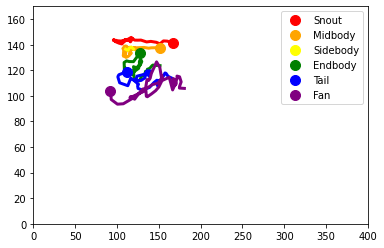

In [ ]:
#all keypoints - trail animation
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
   
# initializing a figure
fig = plt.figure()
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 400), 
                ylim =(0, 170)) 
  
# initializing a line variable
line0, = axis.plot([], [], lw = 3, color = 'red') 
line1, = axis.plot([], [], lw = 3, color = 'orange') 
line2, = axis.plot([], [], lw = 3, color = 'yellow') 
line3, = axis.plot([], [], lw = 3, color = 'green') 
line4, = axis.plot([], [], lw = 3, color = 'blue') 
line5, = axis.plot([], [], lw = 3, color = 'purple') 
pt0, = axis.plot([], [], 'g.', color = 'red', ms=20, label = 'Snout')
pt1, = axis.plot([], [], 'g.', color = 'orange', ms=20, label = 'Midbody')
pt2, = axis.plot([], [], 'g.', color = 'yellow', ms=20, label = 'Sidebody')
pt3, = axis.plot([], [], 'g.', color = 'green', ms=20, label = 'Endbody')
pt4, = axis.plot([], [], 'g.', color = 'blue', ms=20, label = 'Tail')
pt5, = axis.plot([], [], 'g.', color = 'purple', ms=20, label = 'Fan')
  
# data which the line will contain (x, y)
def init(): 
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    pt0.set_data([], [])
    pt1.set_data([], [])
    pt2.set_data([], [])
    pt3.set_data([], [])
    pt4.set_data([], [])
    pt5.set_data([], [])
    return line0,line1,line2,line3,line4,line5

def animate(i):
    x0 = keypoint_arr[:1000, 0, 0]
    y0 = keypoint_arr[:1000, 0, 1]
    x1 = keypoint_arr[:1000, 1, 0]
    y1 = keypoint_arr[:1000, 1, 1]
    x2 = keypoint_arr[:1000, 2, 0]
    y2 = keypoint_arr[:1000, 2, 1]
    x3 = keypoint_arr[:1000, 3, 0]
    y3 = keypoint_arr[:1000, 3, 1]
    x4 = keypoint_arr[:1000, 4, 0]
    y4 = keypoint_arr[:1000, 4, 1]
    x5 = keypoint_arr[:1000, 5, 0]
    y5 = keypoint_arr[:1000, 5, 1]
    line0.set_data(x0[:i+1], y0[:i+1])
    line1.set_data(x1[:i+1], y1[:i+1])
    line2.set_data(x2[:i+1], y2[:i+1])
    line3.set_data(x3[:i+1], y3[:i+1])
    line4.set_data(x4[:i+1], y4[:i+1])
    line5.set_data(x5[:i+1], y5[:i+1])
    pt0.set_data(x0[i],y0[i])
    pt1.set_data(x1[i],y1[i])
    pt2.set_data(x2[i],y2[i])
    pt3.set_data(x3[i],y3[i])
    pt4.set_data(x4[i],y4[i])
    pt5.set_data(x5[i],y5[i])
    return line0,line1,line2,line3,line4,line5
   
plt.legend()

anim = FuncAnimation(fig, animate, init_func = init, frames = 60, interval = 160, blit = True)
  
anim.save('KeypointMovement.mp4', writer = 'ffmpeg', fps = 30)

from IPython.display import HTML
HTML(anim.to_html5_video())

NameError: ignored

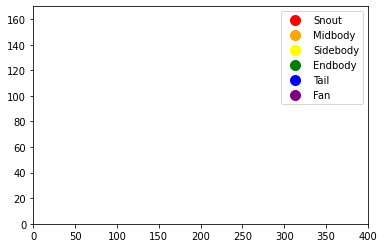

In [ ]:
#all keypoints - skeleton animation
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
   
# initializing a figure
fig = plt.figure()
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 400), 
                ylim =(0, 170)) 
  
# initializing a line variable
line0, = axis.plot([], [], lw = 3, color = 'black') 
line1, = axis.plot([], [], lw = 3, color = 'black') 
line2, = axis.plot([], [], lw = 3, color = 'black') 
line3, = axis.plot([], [], lw = 3, color = 'black') 
line4, = axis.plot([], [], lw = 3, color = 'black') 
line5, = axis.plot([], [], lw = 3, color = 'black') 

pt0, = axis.plot([], [], 'g.', color = 'red', ms=20, label = 'Snout')
pt1, = axis.plot([], [], 'g.', color = 'orange', ms=20, label = 'Midbody')
pt2, = axis.plot([], [], 'g.', color = 'yellow', ms=20, label = 'Sidebody')
pt3, = axis.plot([], [], 'g.', color = 'green', ms=20, label = 'Endbody')
pt4, = axis.plot([], [], 'g.', color = 'blue', ms=20, label = 'Tail')
pt5, = axis.plot([], [], 'g.', color = 'purple', ms=20, label = 'Fan')
  
# data which the line will contain (x, y)
def init(): 
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    pt0.set_data([], [])
    pt1.set_data([], [])
    pt2.set_data([], [])
    pt3.set_data([], [])
    pt4.set_data([], [])
    pt5.set_data([], [])
    return line0,line1,line2,line3,line4,line5

def animate(i):
    x0 = keypoint_arr[:1000, 0, 0]
    y0 = keypoint_arr[:1000, 0, 1]
    x1 = keypoint_arr[:1000, 1, 0]
    y1 = keypoint_arr[:1000, 1, 1]
    x2 = keypoint_arr[:1000, 2, 0]
    y2 = keypoint_arr[:1000, 2, 1]
    x3 = keypoint_arr[:1000, 3, 0]
    y3 = keypoint_arr[:1000, 3, 1]
    x4 = keypoint_arr[:1000, 4, 0]
    y4 = keypoint_arr[:1000, 4, 1]
    x5 = keypoint_arr[:1000, 5, 0]
    y5 = keypoint_arr[:1000, 5, 1]
    x01vals = [x0[i], x1[i]]
    y01vals = [y0[i], y1[i]]
    x12vals = [x1[i], x2[i]]
    y12vals = [y1[i], y2[i]]
    x23vals = [x2[i], x3[i]]
    y23vals = [y2[i], y3[i]]
    x34vals = [x3[i], x4[i]]
    y34vals = [y3[i], y4[i]]
    x45vals = [x4[i], x5[i]]
    y45vals = [y4[i], y5[i]]

    x13vals = [x1[i], x3[i]]
    y13vals = [y1[i], y3[i]] 

    line0.set_data(x01vals,y01vals)
    line1.set_data(x12vals,y12vals)
    line2.set_data(x23vals,y23vals)
    line3.set_data(x34vals,y34vals)
    line4.set_data(x45vals,y45vals)
    line5.set_data(x13vals,y13vals)
   
    pt0.set_data(x0[i],y0[i])
    pt1.set_data(x1[i],y1[i])
    pt2.set_data(x2[i],y2[i])
    pt3.set_data(x3[i],y3[i])
    pt4.set_data(x4[i],y4[i])
    pt5.set_data(x5[i],y5[i])
    return line0,line1,line2,line3,line4,line5
   
plt.legend()

anim = FuncAnimation(fig, animate, init_func = init, frames = 100, interval = 50, blit = True)
  
anim.save('KeypointMovement.mp4', writer = 'ffmpeg', fps = 30)

from IPython.display import HTML
HTML(anim.to_html5_video())

No handles with labels found to put in legend.


CalledProcessError: ignored

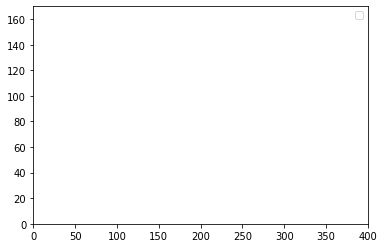

In [ ]:
#all keypoints - trail animation efficient
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
   
# initializing a figure
fig = plt.figure()
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 400), 
                ylim =(0, 170)) 
  
# initializing a line variable
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = len(colors)
lines = []
pts = []
for i in range(n):
  line, = axis.plot([], [], lw=3, color=colors[i])
  lines.append(line)
  pt, = axis.plot([], [], 'g.', color=colors[i], ms=20)
  pts.append(pt)


  
# data which the line will contain (x, y)
def init(): 
  for i in range(n):
    lines[i].set_data([], [])
   
    pt0.set_data([], [])
    pt1.set_data([], [])
    pt2.set_data([], [])
    pt3.set_data([], [])
    pt4.set_data([], [])
    pt5.set_data([], [])
    return line0,line1,line2,line3,line4,line5

def animate(i):
    x0 = keypoint_arr[:1000, 0, 0]
    y0 = keypoint_arr[:1000, 0, 1]
    x1 = keypoint_arr[:1000, 1, 0]
    y1 = keypoint_arr[:1000, 1, 1]
    x2 = keypoint_arr[:1000, 2, 0]
    y2 = keypoint_arr[:1000, 2, 1]
    x3 = keypoint_arr[:1000, 3, 0]
    y3 = keypoint_arr[:1000, 3, 1]
    x4 = keypoint_arr[:1000, 4, 0]
    y4 = keypoint_arr[:1000, 4, 1]
    x5 = keypoint_arr[:1000, 5, 0]
    y5 = keypoint_arr[:1000, 5, 1]
    line0.set_data(x0[i],y0[i])
    line1.set_data(x0[i],y0[i])
    line2.set_data(x0[i],y0[i])
    line3.set_data(x0[i],y0[i])
    line4.set_data(x0[i],y0[i])
    pt0.set_data(x0[i],y0[i])
    pt1.set_data(x1[i],y1[i])
    pt2.set_data(x2[i],y2[i])
    pt3.set_data(x3[i],y3[i])
    pt4.set_data(x4[i],y4[i])
    pt5.set_data(x5[i],y5[i])
    return line0,line1,line2,line3,line4
   
plt.legend()

anim = FuncAnimation(fig, animate, init_func = init, frames = 60, interval = 160, blit = True)
  
anim.save('KeypointMovement.mp4', writer = 'ffmpeg', fps = 30)

from IPython.display import HTML
HTML(anim.to_html5_video())

In [ ]:
arr = keypoint_arr[1000,:,0]
print(arr)
print((~np.isnan(arr)).sum())
print(np.count_nonzero(~np.isnan(arr)))

%timeit (~np.isnan(arr)).sum()
%timeit np.count_nonzero(~np.isnan(arr))

[45.055824 54.233627       nan 66.81265  82.605705 96.99266 ]
5
5
The slowest run took 12.90 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.78 µs per loop
The slowest run took 11.46 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.6 µs per loop


(1723656, 6)
(1723656,)


(array([0.000000e+00, 3.700000e+01, 6.800000e+01, 3.955000e+03,
        4.475600e+04, 1.657967e+06, 1.687300e+04]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

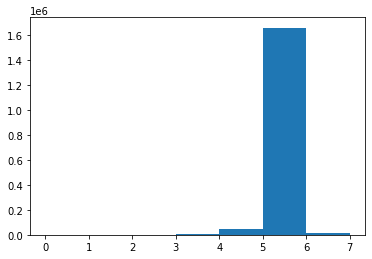

In [ ]:
arr = keypoint_arr[:,:,0]
print(np.isnan(arr).shape)
keypoint_counts = ((~np.isnan(arr)).sum(axis=1))
print(keypoint_counts.shape)
plt.hist(keypoint_counts,np.arange(0,8))
# do body length, velocity, acceleration, video
# body length array 1.7mil
# velocty and a of the midbody (arrays of 1.7mil)

In [ ]:
#velocity for first 10 rows

print(timestamp_vec[1] - timestamp_vec[0])
print(timestamp_vec[2] - timestamp_vec[1])


#v_arr = (((keypoint_arr[:,1,0] - keypoint_arr[:,1,0])**2 + (keypoint_arr[j,1,1] - keypoint_arr[j-1,1,1])**2)**0.5) / (timestamp_vec[j] - timestamp_vec[j-1])

v_arr = []
for j in range(10):
  v_arr.append((((keypoint_arr[j,1,0] - keypoint_arr[j-1,1,0])**2 + (keypoint_arr[j,1,1] - keypoint_arr[j-1,1,1])**2)**0.5) / (timestamp_vec[j] - timestamp_vec[j-1]))

print(v_arr)

# v = (((keypoint_arr[i,1,0] - keypoint_arr[i-1,1,0])**2 - (keypoint_arr[i,1,0] - keypoint_arr[i-1,1,0])**2)**0.5)/t
# v_arr = v(keypoint_arr[2])

0.0463101863861084
0.049902915954589844
[-0.0010073429340595635, 58.53557701485843, 42.58907017444491, 39.67478165324076, 38.75534102270569, 16.812629150769364, 27.544602163863658, 19.748897612992636, 20.696398023859356, 13.650133746854824]


In [ ]:
#acceleration for first 10 rows

a_arr = []

for j in range(10):
  a_arr.append((v_arr[j] - v_arr[j-1]) / (timestamp_vec[j] - timestamp_vec[j-1]))

print(a_arr)

[0.00015810913287230195, 1264.0109860441337, -319.5506021115953, -57.97949939826621, -18.477908973549816, -438.0650672574052, 209.85937627843205, -157.24060467879417, 18.939821011971365, -141.1259565464944]


In [ ]:
#body length - distance between fan and snout

# bl = ((keypoint_arr[i,0,0] - keypoint_arr[i,5,0])**2 - (keypoint_arr[i,0,0] - keypoint_arr[i,5,0])**2)**0.5
bl_arr = ((keypoint_arr[:,0,0] - keypoint_arr[:,5,0])**2 + (keypoint_arr[:,0,1] - keypoint_arr[:,5,1])**2)**0.5

print(bl_arr)
#print('{:.9f}'.format(bl_arr))

[80.175446 76.44429  77.81455  ... 76.85024  80.73101  81.71295 ]


In [ ]:
#distance between 2 adjacent keypoints

def d_kps(kp1, kp2, frame):
  return ((keypoint_arr[frame,kp1,0] - keypoint_arr[frame,kp2,0])**2 + (keypoint_arr[frame,kp1,1] - keypoint_arr[frame,kp2,1])**2)**0.5

d_kps(0,5,0)

80.1754407662543